In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [5]:
df=pd.read_csv("/content/concrete_data.csv")

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [10]:
corr=df.corr()

<Axes: >

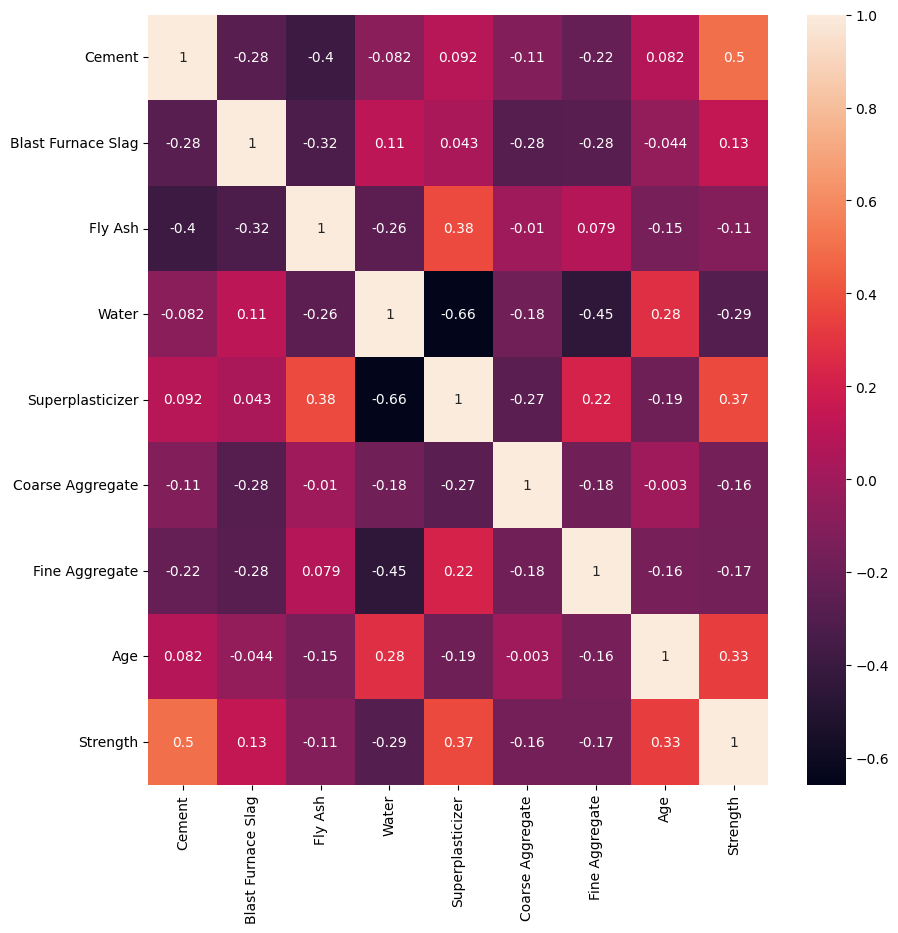

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)

checking outliers

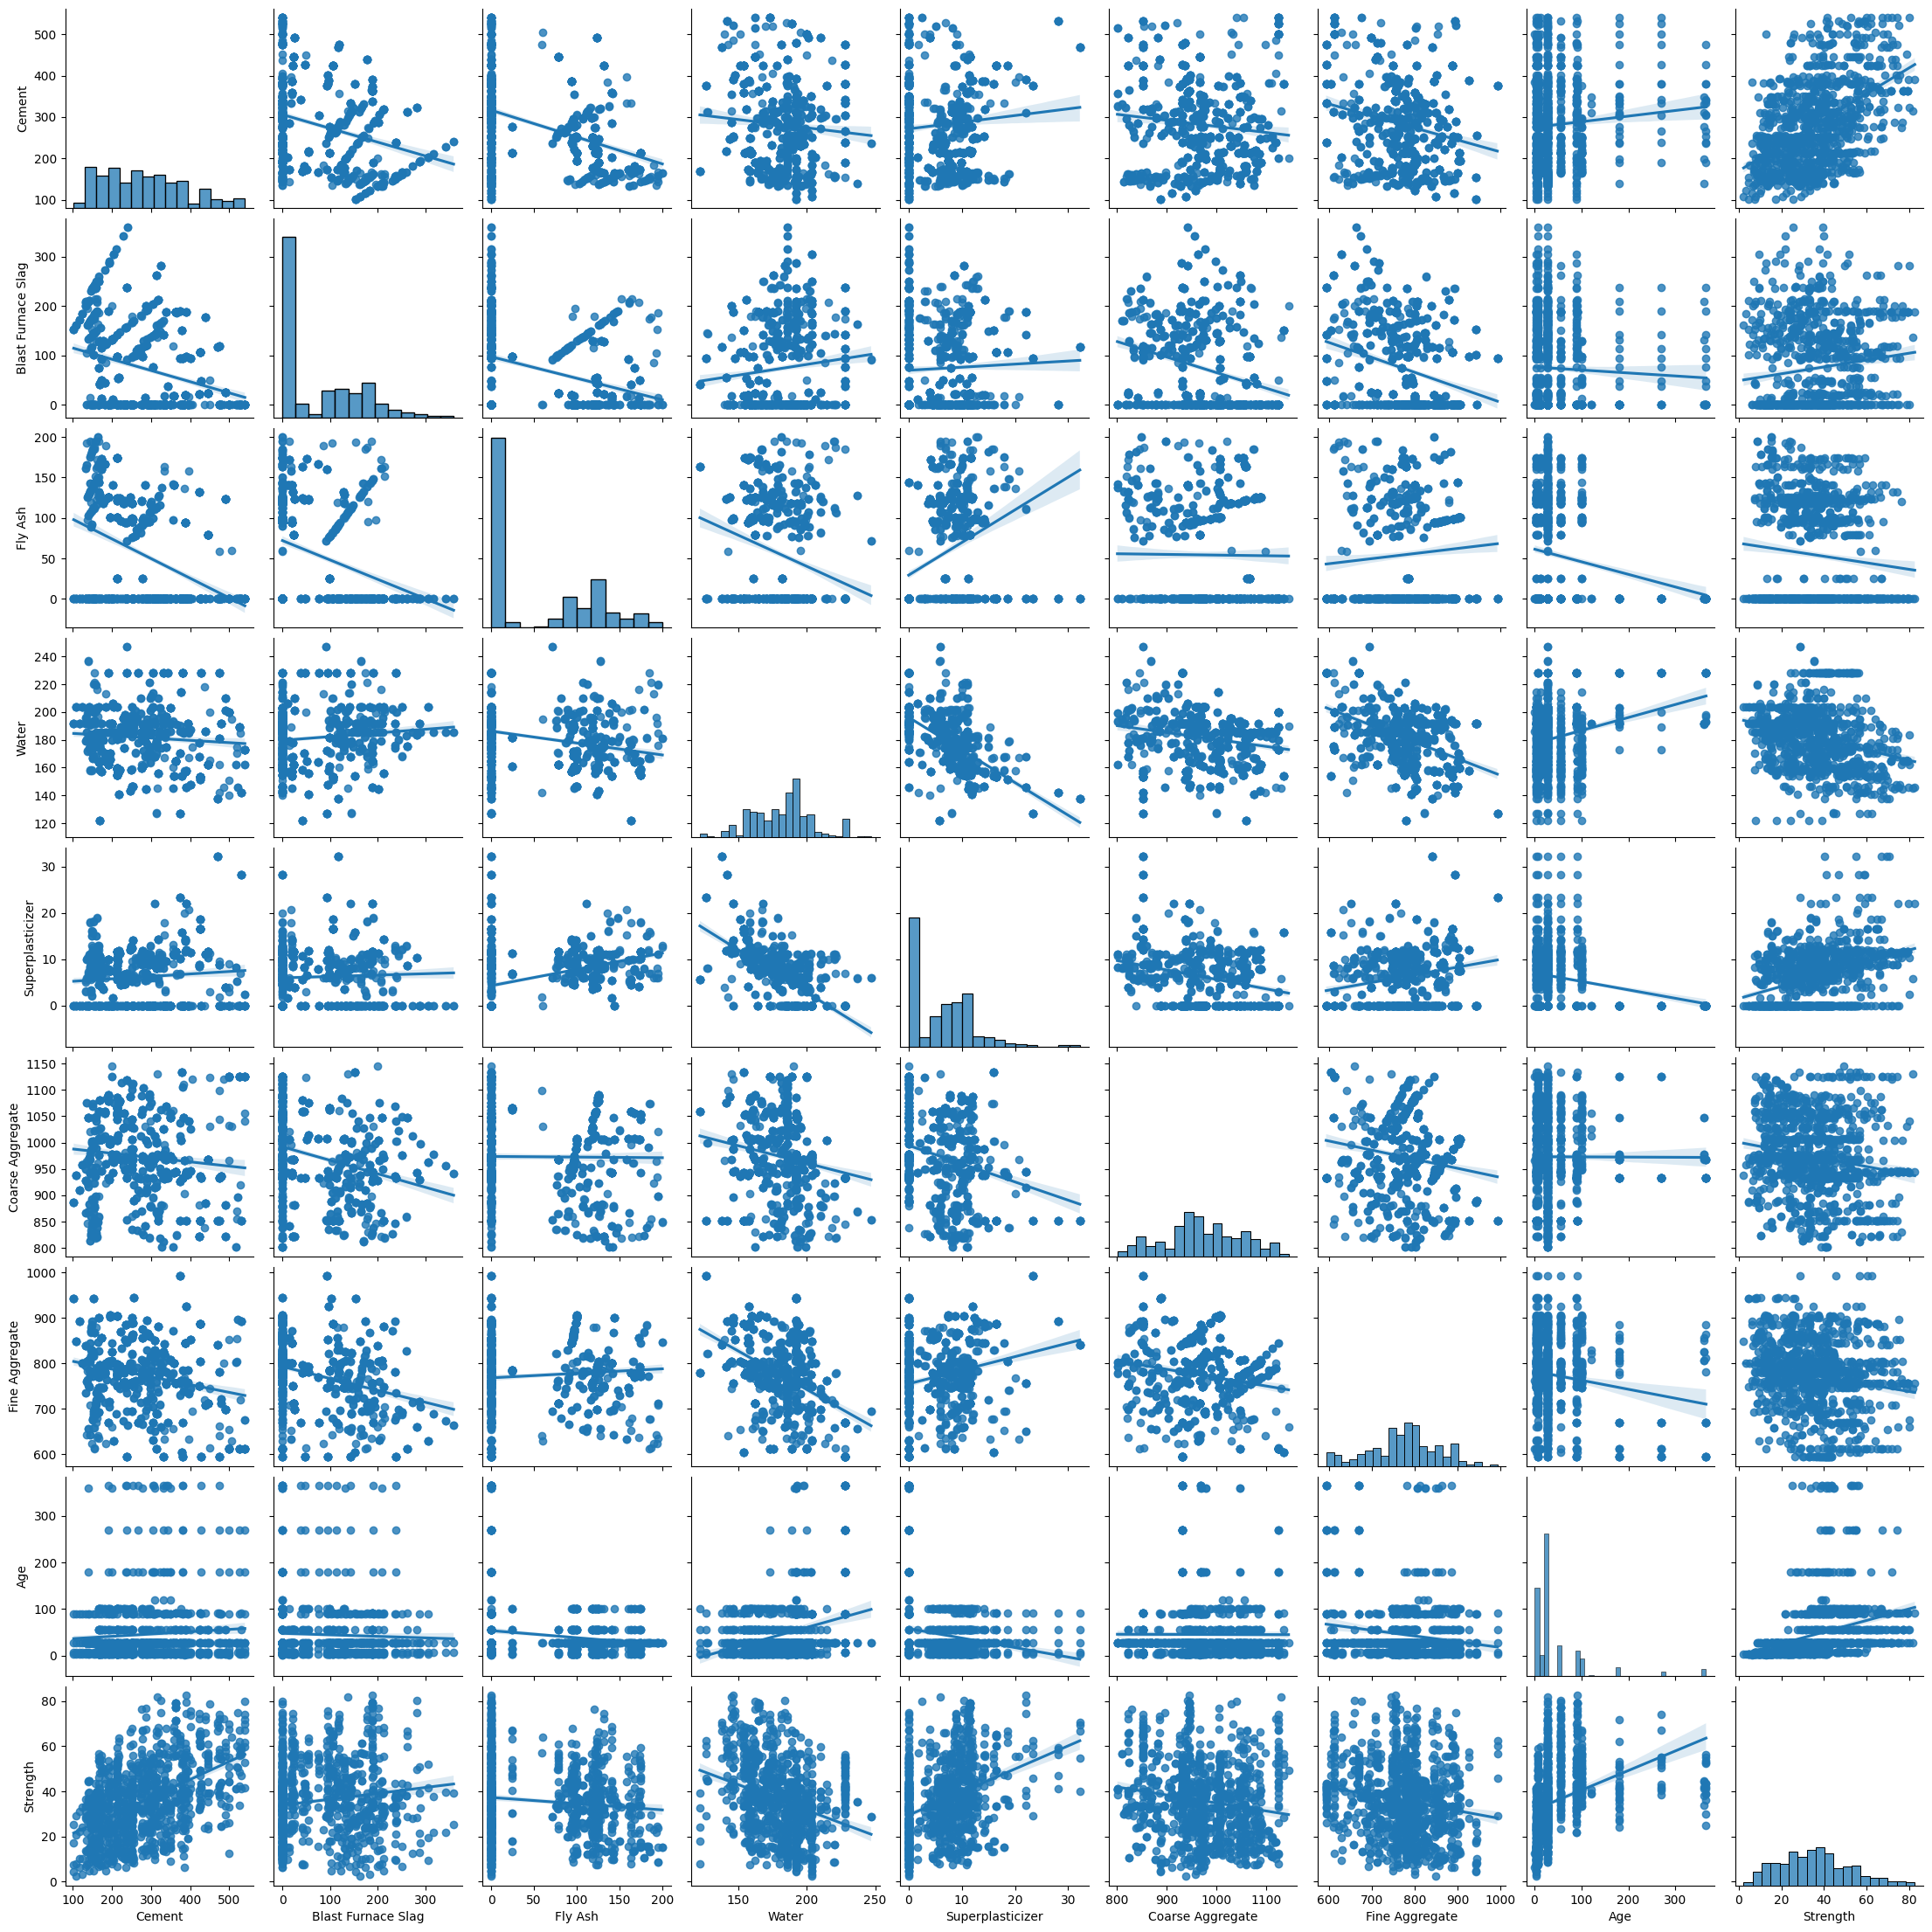

In [12]:
fig = sns.pairplot(df, kind = "reg")

In [13]:
def remove_outlier(df, col_name):
    plt.figure(figsize=(20,20))
    f, axes = plt.subplots(1, 2,figsize=(12,4))
    sns.boxplot(df[col_name], ax=axes[0], color='skyblue').set_title("Before Outlier Removal: "+col_name)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    df[col_name] = df[col_name].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))
    sns.boxplot(df[col_name], ax=axes[1], color='pink').set_title("After Outlier Removal: "+col_name)
    print()
    plt.show()
    return df

<Figure size 2000x2000 with 0 Axes>

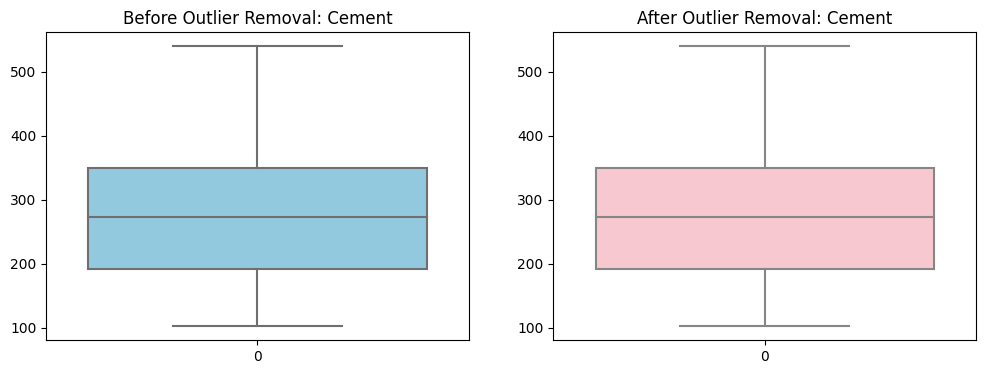

<Figure size 2000x2000 with 0 Axes>

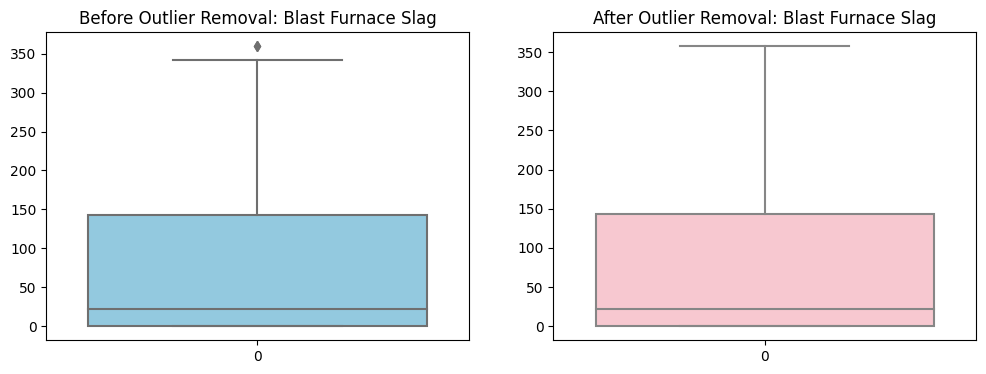

<Figure size 2000x2000 with 0 Axes>

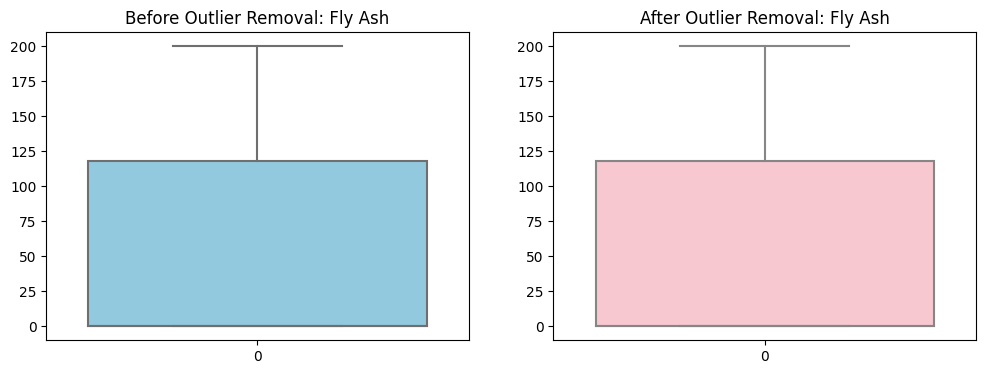

<Figure size 2000x2000 with 0 Axes>

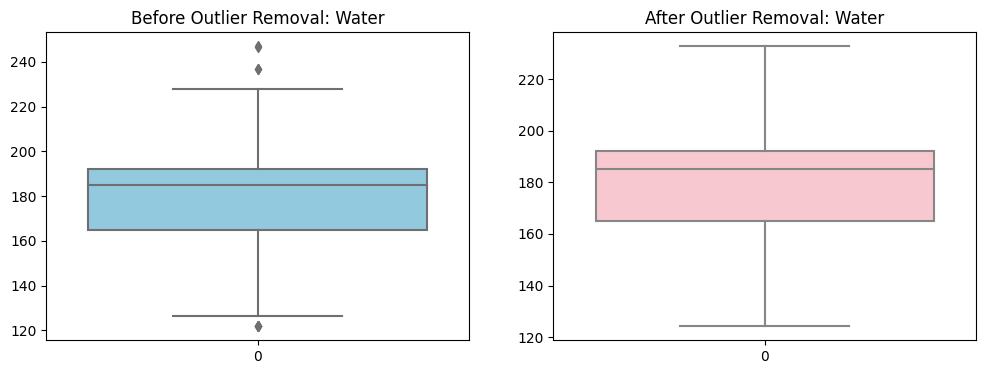

<Figure size 2000x2000 with 0 Axes>

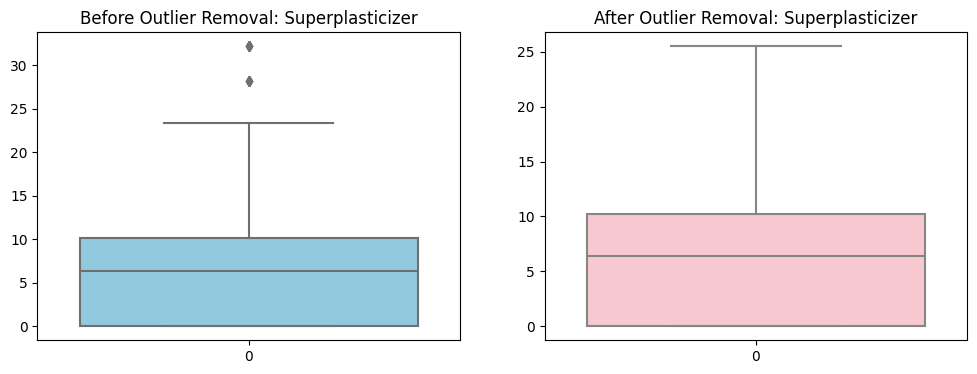

<Figure size 2000x2000 with 0 Axes>

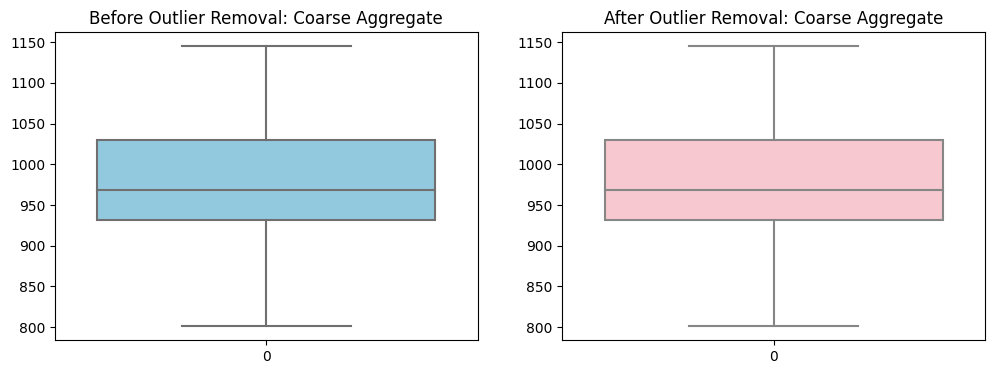

<Figure size 2000x2000 with 0 Axes>

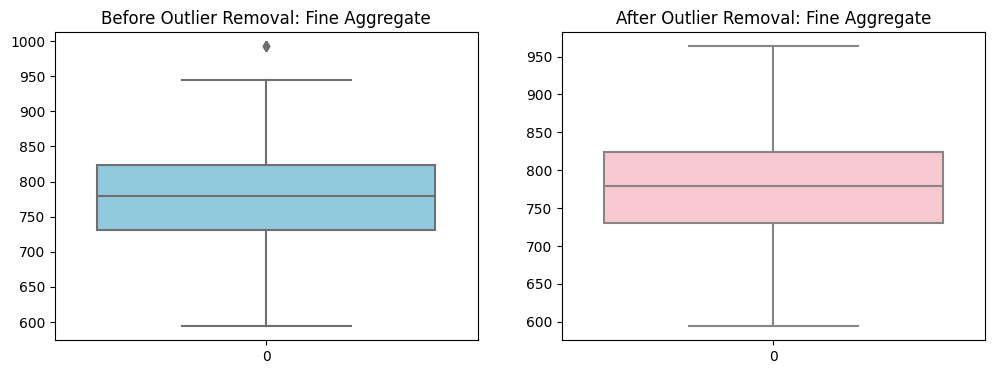

<Figure size 2000x2000 with 0 Axes>

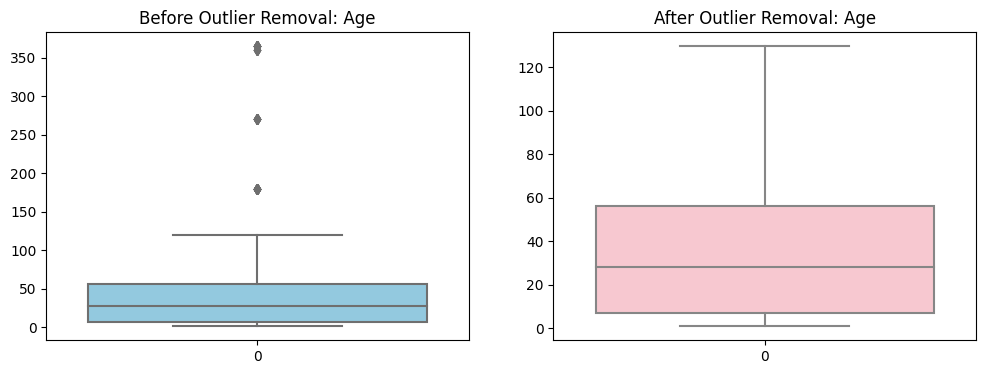

In [14]:
for col in df.select_dtypes(exclude="object").columns[:-1]:
    df = remove_outlier(df,col)

In [15]:
x = df.drop("Strength", axis = 1).values
y = df["Strength"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(824, 8) (824,) (206, 8) (206,)


In [17]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [18]:
def model_train(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R2 Score :", r2_score(y_test, y_pred))
    print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error :", mean_squared_error(y_test, y_pred)**0.5)

In [19]:
model_train(LinearRegression(), x_train, x_test, y_train, y_test)

R2 Score : 0.736663195398345
Mean Squared Error : 67.85580998130344
Root Mean Squared Error : 8.237463807586861


In [20]:
model_train(Ridge(), x_train, x_test, y_train, y_test)

R2 Score : 0.7369500474701574
Mean Squared Error : 67.78189483029718
Root Mean Squared Error : 8.232976061564687


In [21]:
model_train(Lasso(), x_train, x_test, y_train, y_test)

R2 Score : 0.6910835194524396
Mean Squared Error : 79.60063932512887
Root Mean Squared Error : 8.921919038252302


Epoch 1/10
21/21 [==============================] - 4s 16ms/step - loss: 1527.8420 - val_loss: 1422.9137
Epoch 2/10
21/21 [==============================] - 0s 6ms/step - loss: 1310.5656 - val_loss: 1063.1537
Epoch 3/10
21/21 [==============================] - 0s 6ms/step - loss: 762.5766 - val_loss: 357.4700
Epoch 4/10
21/21 [==============================] - 0s 6ms/step - loss: 245.3741 - val_loss: 147.9392
Epoch 5/10
21/21 [==============================] - 0s 6ms/step - loss: 188.6730 - val_loss: 136.7194
Epoch 6/10
21/21 [==============================] - 0s 6ms/step - loss: 163.1767 - val_loss: 121.4357
Epoch 7/10
21/21 [==============================] - 0s 6ms/step - loss: 152.3791 - val_loss: 118.6783
Epoch 8/10
21/21 [==============================] - 0s 5ms/step - loss: 143.7406 - val_loss: 111.6482
Epoch 9/10
21/21 [==============================] - 0s 4ms/step - loss: 136.0315 - val_loss: 112.6092
Epoch 10/10
7/7 [==============================] - 0s 4ms/step
Neural Network

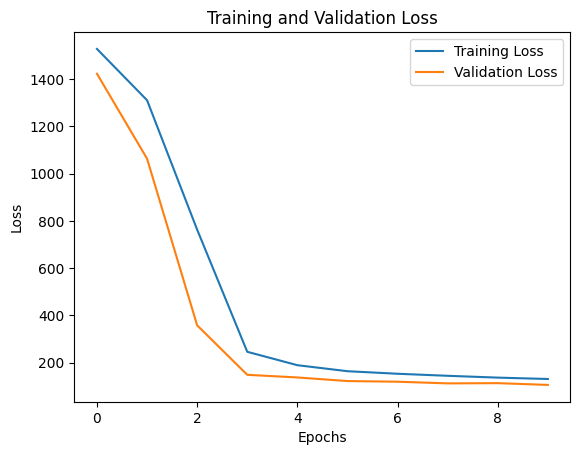

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

y_pred = model.predict(x_test)
nn_mse = mean_squared_error(y_test, y_pred)

print("Neural Network MSE:", nn_mse)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


# **OR**

In [24]:
concrete_data= pd.read_csv("/content/concrete_data.csv")
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']]
target = concrete_data['Strength']
n_cols = predictors.shape[1]

predictors_norm = (predictors - predictors.mean()) / predictors.std()

In [25]:
def regression_model():
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [26]:
mse = []

for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3)
    model = regression_model()
    model.fit(x_train, y_train, epochs=40, verbose=0)
    y_pred = model.predict(x_test)

    mse.append(mean_squared_error(y_test, y_pred))

10/10 [==============================] - 0s 2ms/step


## mean squared errors of the 50 iterations:

In [27]:
print('number of iterations: {:.2f}'.format(len(mse)))
mse

number of iterations: 50.00


[130.57449855446092,
 105.05537544518202,
 129.17962382939047,
 128.70495680697837,
 117.86934443846387,
 131.96909391197377,
 119.54546350589219,
 120.5747173932197,
 113.91488376458807,
 81.42213973366967,
 132.8838841028991,
 143.2747079139975,
 133.50349607080832,
 107.82495256431932,
 154.86704319052515,
 120.23353374160833,
 104.84474730876151,
 142.71913855240297,
 109.41890246051567,
 102.80750945774294,
 121.7986692835446,
 84.79117617948252,
 118.54931384751563,
 120.24339136111122,
 101.19410982454224,
 123.27953056794983,
 108.2631355114151,
 130.54092110202274,
 116.42419543426563,
 125.09439908817876,
 81.05146780161292,
 120.94484329471868,
 142.97573145689506,
 130.54258434549735,
 94.40477541259834,
 106.87200980472242,
 123.64857141832181,
 101.03009042136453,
 124.17943166213173,
 138.36947277809315,
 115.35477614021302,
 121.26078610432228,
 91.04324305324711,
 125.05807326566077,
 83.27750289835221,
 129.07935723786284,
 140.78745730379944,
 124.09596933654346,
 13

In [28]:
print('mse_Mean: {:.2f}'.format(np.mean(mse)))
print('mse_StdDev: {:.2f}'.format(np.std(mse)))

mse_Mean: 118.70
mse_StdDev: 16.83


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import os

data_dir = '/content/drive/MyDrive/mid1.zip'

In [31]:
import zipfile


zip_file = zipfile.ZipFile("/content/drive/MyDrive/mid1.zip")


zip_file.extractall()


zip_file.close()



In [32]:
import os
root_path =('./content/Training')
male_path = os.path.join('./content/Training/male')
female_path = os.path.join('./content/Training/female')

In [33]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import *
datagen = ImageDataGenerator(rescale=1/255)

train_generator = datagen.flow_from_directory(
        '/content/Training',  # This is the source directory for training images
        target_size=(50, 50),  # All images will be resized to50,50
        batch_size=80,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 47009 images belonging to 2 classes.


In [37]:
mkdir ./content

In [38]:
mkdir ./content/Training

In [40]:
root_path= '/content/Training'
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(os.path.join(root_path, name))) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 2 
Class Names : ['female', 'male']
female : 23243 
male : 23766


In [71]:
root_path = '/content/Training'
male_path = os.path.join(root_path, 'male')
female_path = os.path.join(root_path, 'female')
male_images = [os.path.join(male_path, img) for img in os.listdir(male_path)]
female_images = [os.path.join(female_path, img) for img in os.listdir(female_path)]

In [72]:
X = male_images + female_images
y = np.concatenate([np.zeros(len(male_images)), np.ones(len(female_images))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

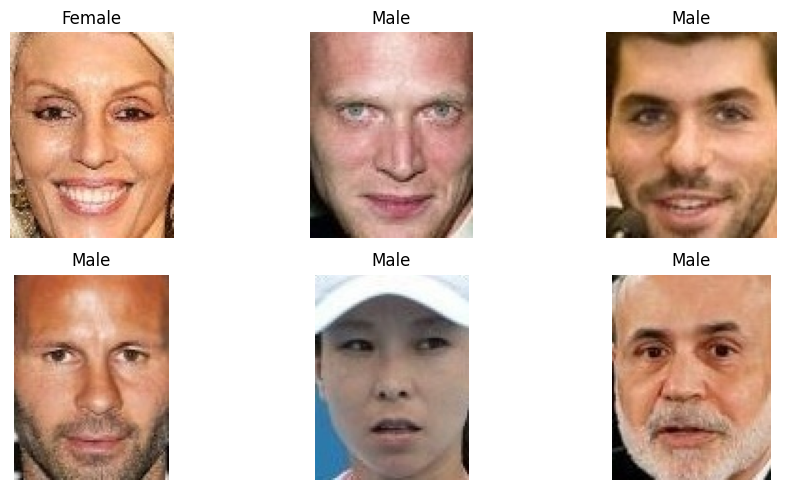

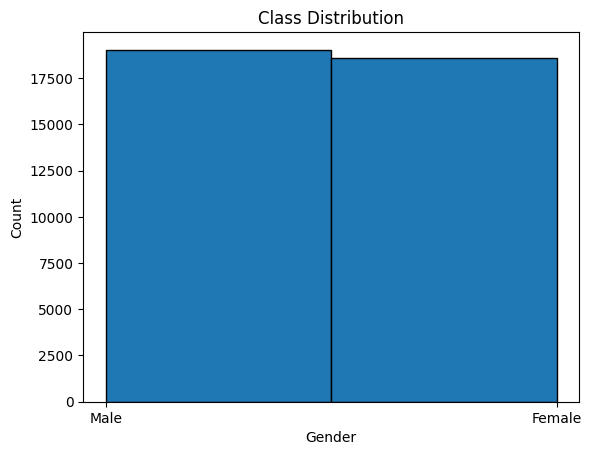

In [73]:
def plot_images(images, labels):
    plt.figure(figsize=(10, 5))
    for i in range(6):
        img = Image.open(images[i])
        num = int(i + 1)
        plt.subplot(2, 3, num)
        plt.imshow(img)
        plt.title('Male' if labels[i] == 0 else 'Female')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
plot_images(X_train, y_train)
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
svm_model = make_pipeline(CountVectorizer(), LinearSVC())
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", svm_accuracy)


Accuracy: 1.0


In [75]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/Training',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary'
)

valid_generator = datagen.flow_from_directory(
    '/content/Validation',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary'
)
history = cnn_model.fit(train_generator, validation_data=valid_generator, epochs=40)
test_loss, test_accuracy = cnn_model.evaluate(valid_generator)
print("CNN Test Accuracy:", test_accuracy)


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.
Epoch 1/40
735/735 [==============================] - 35s 43ms/step - loss: 0.2454 - accuracy: 0.8962 - val_loss: 0.1224 - val_accuracy: 0.9581
Epoch 2/40
735/735 [==============================] - 33s 45ms/step - loss: 0.1424 - accuracy: 0.9494 - val_loss: 0.1101 - val_accuracy: 0.9615
Epoch 3/40
735/735 [==============================] - 35s 47ms/step - loss: 0.1231 - accuracy: 0.9564 - val_loss: 0.1047 - val_accuracy: 0.9605
Epoch 4/40
735/735 [==============================] - 32s 43ms/step - loss: 0.1100 - accuracy: 0.9602 - val_loss: 0.1080 - val_accuracy: 0.9605
Epoch 5/40
735/735 [==============================] - 31s 43ms/step - loss: 0.1024 - accuracy: 0.9635 - val_loss: 0.0996 - val_accuracy: 0.9638
Epoch 6/40
735/735 [==============================] - 31s 43ms/step - loss: 0.0904 - accuracy: 0.9678 - val_loss: 0.1057 - val_accuracy: 0.9607
Epoch 7/40
735/735 [==============================

<Figure size 640x480 with 0 Axes>

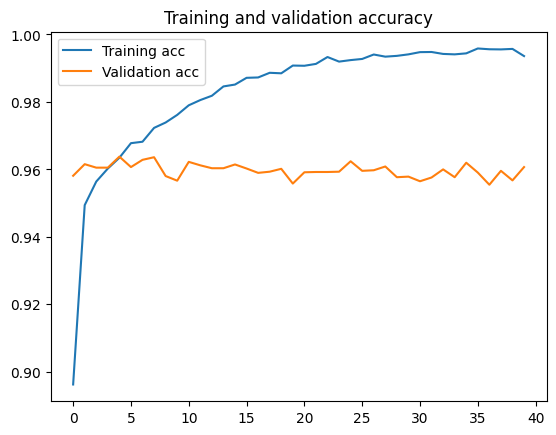

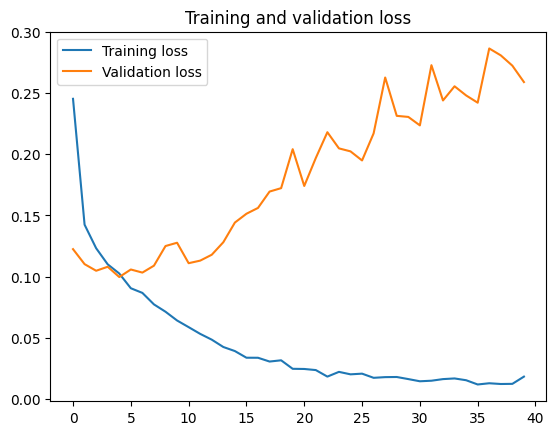

<Figure size 640x480 with 0 Axes>

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(acc,  label='Training acc')
plt.plot(val_acc,  label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(loss,  label='Training loss')
plt.plot( val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

# Bad

In [82]:
valid_path= '/content/Validation'
class_names = sorted(os.listdir(valid_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(os.path.join(valid_path, name))) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 2 
Class Names : ['female', 'male']
female : 5841 
male : 5808


In [84]:
valid_path = '/content/Validation'
valid_dis = [len(os.path.join(valid_path, name)) for name in class_names]
fig = px.pie(names=class_names, values=valid_dis,
             title="test Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [85]:
train_gen = ImageDataGenerator(rescale=1/255.,
                               rotation_range=10, horizontal_flip=True)
valid_ds = ImageDataGenerator(rescale=1/255)

train_ds = train_gen.flow_from_directory(root_path, class_mode='binary',
                                         target_size=(50,50), shuffle=True,
                                         batch_size=80)

valid_ds = valid_ds.flow_from_directory(valid_path, class_mode='binary',
                                         target_size=(50,50),
                                         shuffle=True, batch_size=80)


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [89]:
from IPython.display import clear_output as cls
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import GlobalAvgPool2D as GAP
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.models import Model
from keras.layers import  Input
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import plotly.express as px

In [90]:
inp = Input(shape = (50, 50, 3))
x = Conv2D(filters = 16 , kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(50, 50, 3))(inp)
x = Conv2D(16 , (3,3), padding = "same", activation='relu')(x)
x = Conv2D(16 , (3,3), padding = "same", activation='relu')(x)
x = BatchNormalization(momentum=0.9)(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(16, (3,3), padding = "same", activation='relu')(x)
x = Dropout(rate=0.3)(x)


x = Conv2D(filters = 32 , kernel_size=(3, 3), padding='SAME', activation='relu')(x)
x = Conv2D(32 , (3,3), padding = "same", activation='relu')(x)
x = Conv2D(32 , (3,3), padding = "same", activation='relu')(x)
x = BatchNormalization(momentum=0.5)(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3,3), padding = "same", activation='relu')(x)
x = Dropout(rate=0.4)(x)

x = Conv2D(filters = 64 , kernel_size=(3, 3), padding='SAME', activation='relu')(x)
x = Conv2D(64 , (3,3), padding = "same", activation='relu')(x)
x = Conv2D(64 , (3,3), padding = "same", activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3,3), padding = "same", activation='relu')(x)

x = Conv2D(filters = 128 , kernel_size=(3, 3), padding='SAME', activation='relu')(x)
x = Conv2D(128 , (3,3), padding = "same", activation='relu')(x)
x = Conv2D(128 , (3,3), padding = "same", activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3,3), padding = "same", activation='relu')(x)
x = Conv2D(filters = 128 , kernel_size=(3, 3), padding='SAME', activation='relu')(x)
x = Conv2D(128 , (3,3), padding = "same", activation='relu')(x)
x = Flatten()(x)

x = Dense(256 , activation = 'relu')(x)
x = Dense(128 , activation = 'relu')(x)
x = Dense(32 , activation = 'relu')(x)
out = Dense(1 , activation = 'sigmoid')(x)
model = Model(inputs=inp, outputs=[out])

In [91]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 50, 50, 16)        448       
                                                                 
 conv2d_40 (Conv2D)          (None, 50, 50, 16)        2320      
                                                                 
 conv2d_41 (Conv2D)          (None, 50, 50, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 25, 25, 16)       0         
 g2D)                                                        

In [92]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [93]:
with tf.device('/device:GPU:0'):
    cbs = [EarlyStopping(patience=3, restore_best_weights=True),
           ModelCheckpoint(filepath = "ModelCheckpoint.h5",
                           monitor= "val_loss",
                           save_best_only = True)]
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(train_ds, validation_data=valid_ds,
                        callbacks=cbs, epochs=15)

Epoch 1/15
588/588 [==============================] - 93s 135ms/step - loss: 0.3150 - accuracy: 0.8578 - val_loss: 0.4252 - val_accuracy: 0.8366
Epoch 2/15
588/588 [==============================] - 91s 155ms/step - loss: 0.1786 - accuracy: 0.9335 - val_loss: 0.1336 - val_accuracy: 0.9495
Epoch 3/15
588/588 [==============================] - 85s 145ms/step - loss: 0.1558 - accuracy: 0.9440 - val_loss: 0.1266 - val_accuracy: 0.9550
Epoch 4/15
588/588 [==============================] - 79s 134ms/step - loss: 0.1470 - accuracy: 0.9481 - val_loss: 0.1124 - val_accuracy: 0.9615
Epoch 5/15
588/588 [==============================] - 80s 137ms/step - loss: 0.1384 - accuracy: 0.9502 - val_loss: 0.1268 - val_accuracy: 0.9538
Epoch 6/15
588/588 [==============================] - 76s 130ms/step - loss: 0.1339 - accuracy: 0.9522 - val_loss: 0.1114 - val_accuracy: 0.9590
Epoch 7/15
588/588 [==============================] - 79s 133ms/step - loss: 0.1296 - accuracy: 0.9532 - val_loss: 0.1394 - val_ac

<Figure size 640x480 with 0 Axes>

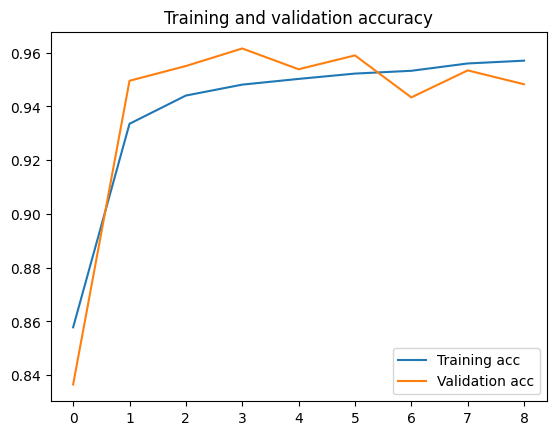

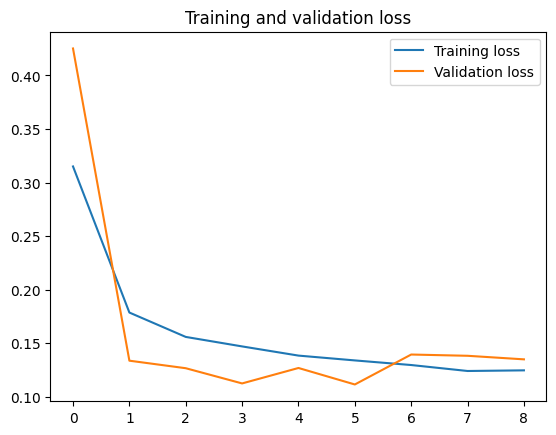

<Figure size 640x480 with 0 Axes>

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(acc,  label='Training acc')
plt.plot(val_acc,  label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(loss,  label='Training loss')
plt.plot( val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [95]:
filepath = cbs[1].filepath
print(filepath)

ModelCheckpoint.h5
